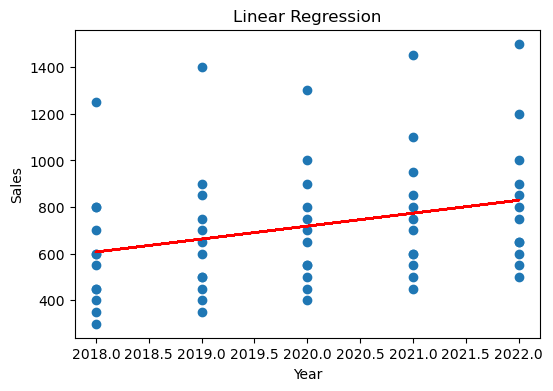

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('salesdata.csv')

# Create a binary target variable
data['Sales_Class'] = data['Sales'].apply(lambda x: 1 if x > 1000 else 0)

# Split the data into features and target
X = data[['Year', 'Sales']]
y = data['Sales_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Initialize and fit a linear regression model
X = sm.add_constant(data['Year'])
y = data['Sales']
model = sm.OLS(y, X).fit()

# Plot linear regression 
plt.figure(figsize=(6, 4))
plt.scatter(data['Year'], data['Sales'])
plt.plot(data['Year'], model.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

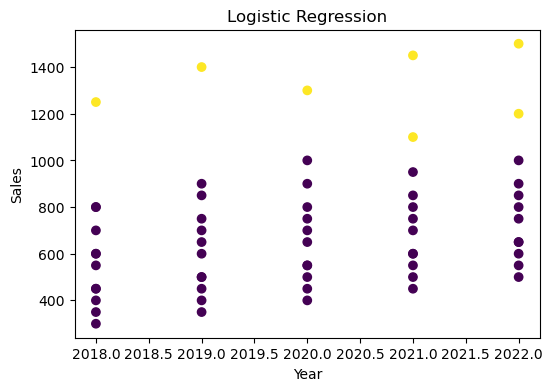

In [2]:
# Plot logistic regression results
plt.figure(figsize=(6, 4))
plt.scatter(data['Year'], data['Sales'], c=data['Sales_Class'], cmap='viridis')
plt.title('Logistic Regression')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()